In [27]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

In [2]:
train = pd.read_csv('./data/enem_train.csv')
test = pd.read_csv('./data/enem_test.csv')

In [3]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


## Determinar as colunas que possuem maior correlação

In [4]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[:10], '\n')
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[-10:])

NU_NOTA_MT                1.000000
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_REDACAO           0.379376
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP2             0.335638
Name: NU_NOTA_MT, dtype: float64 

IN_MARCA_PASSO             NaN
IN_SONDA                   NaN
IN_MEDICAMENTOS            NaN
IN_SALA_INDIVIDUAL         NaN
IN_SALA_ESPECIAL           NaN
IN_SALA_ACOMPANHANTE       NaN
IN_MOBILIARIO_ESPECIFICO   NaN
IN_MATERIAL_ESPECIFICO     NaN
TP_PRESENCA_LC             NaN
TP_PRESENCA_MT             NaN
Name: NU_NOTA_MT, dtype: float64


In [5]:
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
            'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
features_corr = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
                 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
df_train = train[features_corr]
df_test = test[features]

## Novo conjunto de dados

In [24]:
train.shape

(13730, 167)

In [6]:
df_train.shape

(13730, 10)

## Pré-processamento dos dados

C:\Users\Eduardo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Eduardo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


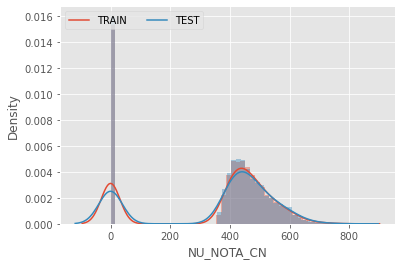

In [7]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [8]:
df_train.isnull().sum()

NU_NOTA_MT         3597
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

In [9]:
df_test.isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

### Removendo dados Nulos

In [10]:
df_train.fillna(0,inplace=True)

C:\Users\Eduardo\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
df_test.fillna(0,inplace=True)

In [12]:
y_train = df_train['NU_NOTA_MT']
df_train.drop('NU_NOTA_MT', axis=1, inplace=True)
x_train = df_train
x_test = df_test[features]
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

C:\Users\Eduardo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Utilizando o RandomForest

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)   

In [14]:
regressor.fit(x_train, y_train) 

RandomForestRegressor(criterion='mae', max_depth=8, n_estimators=500, n_jobs=-1,
                      random_state=0)

In [15]:
x_test = df_test[features] 
x_test = sc.transform(x_test)

In [16]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [17]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 40.31835824
MSE: 3639.15202359
RMSE: 60.32538457


In [18]:
y_pred_test

array([417.8104, 442.2956, 595.1624, ..., 692.0697, 443.1866,   0.    ])

In [19]:
submission = pd.DataFrame()
submission['NU_INSCRICAO'] = test.NU_INSCRICAO
submission['NU_NOTA_MT'] = y_pred_test.round(1)

In [20]:
submission.sample(20)

,NU_INSCRICAO,NU_NOTA_MT
1233,5d42040f9935aff1dabc32c4f5a578148138e1af,413.3
678,794b0d35e609fcf9fe4f5212be47059fadc436c4,423.2
3589,c476c28c271114351f7df88e4ada53a02a6ab7fd,436.9
3573,962a5b091ed826bef75a8cd6a3640462ebf18c18,0.0
732,0e6722ba4847f0521eb339ddf71ceba0a922af00,515.6
153,bc40729846bf209b06e2a9a890e01d4e6780f5b4,0.0
3542,834d210e7c1165c0ade65e4b2ab20c2c2e9ee774,0.0
2102,1f67a7ec61ff8813c631eb388bbc2f843cfc86b7,434.3
2680,467224cc802895d7c56ddade42b895a4f9feb351,444.6
3400,7eeafe18c6d134aa42553db26ab249ff70060dcd,459.6


In [21]:
submission.to_csv('answer.csv', index=False, header=True)

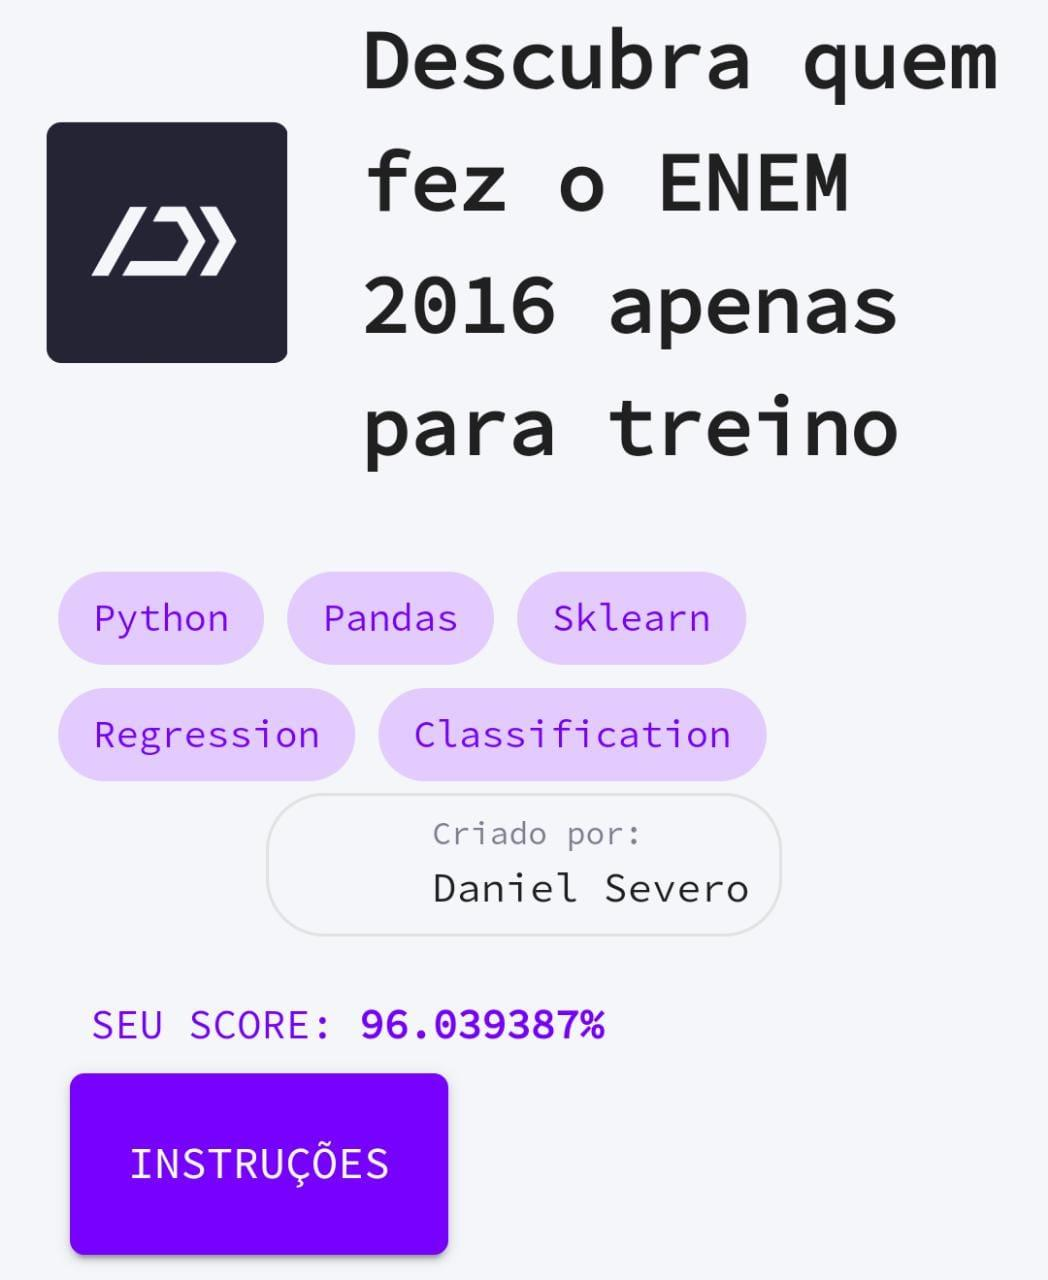

In [31]:
Image('imagens/Enem.jpeg')